# File I/O

Now that you are confident in mathematical operations and the plotting of arrays of data, it will be useful to be able to read data (for example from an experimental measurement) into the Python kernel. 
This will allow you to perform mathematical operations on data from the file and potentially plot the analysed result. 

In this section, we will show the parsing of two common types of file, known as `.txt` (text files) and `.csv` (comma-separated value file). 
The same basic function, from the `numpy` library, is used to read these files in, with some changes necessary to the keyword arguments that are passed to the function. 

## `.txt` files

Text files look like the following, 

```
# A text file with ideal gas information
# The rows are temperature (K), volume (cubic meters), and pressure (Pa)
200 600 1000 1400 1800
0.8 0.2 1.0 0.6 0.1
5020 60370 20110 46940 362160
```

This file is available from <a href="https://github.com/pythoninchemistry/ch40208/raw/master/CH40208/working_with_data/ideal_gas_rows.txt" download>this link</a>, you will need to [upload the file](https://youtu.be/5E2HhNfFpF8) to the chemistry JupyterHub. 
We can input the data from this file into three NumPy arrays with the following function. 

In [1]:
import numpy as np

temperature, volume, pressure = np.loadtxt('ideal_gas_rows.txt')

In [2]:
print(temperature)

[ 200.  600. 1000. 1400. 1800.]


In [3]:
print(volume)

[0.8 0.2 1.  0.6 0.1]


In [4]:
print(pressure)

[  5020.  60370.  20110.  46940. 362160.]


We can then plot the pressure multiplied by the volume, against the temperature to observe the ideal gas relationship that was introduced in the previous exercise. 

In [5]:
import matplotlib.pyplot as plt

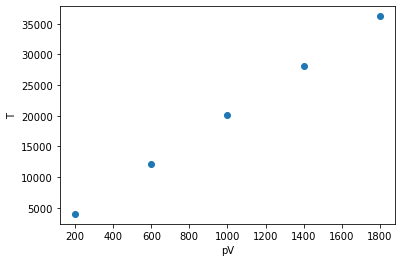

In [6]:
plt.plot(temperature, pressure * volume, 'o')
plt.xlabel('pV')
plt.ylabel('T')
plt.show()

Often experimental devices will output data as columns, rather than rows (this is probably more common in **real** measurement devices), such as in <a href="https://github.com/pythoninchemistry/ch40208/raw/master/CH40208/working_with_data/ideal_gas_cols.txt" download>this file</a>, shown below. 

```
# A text file with columnar ideal gas information
# temperature (K) volume (cubic meters) pressure (Pa)
200 0.8 5020
600 0.2 60370
1000 1.0 20110
1400 0.6 46940
1800 0.1 362160
```

Therefore it is necessary to modify the `np.loadtxt()` function to account for this.
To do so, we use a **keyword argument**, this is a function argument that has a special identifier preceding it. 
To read in the columnar data we can use the following.

In [7]:
temperature, volume, pressure = np.loadtxt('ideal_gas_cols.txt', unpack=True)

In [8]:
print(temperature)

[ 200.  600. 1000. 1400. 1800.]


In [9]:
print(volume)

[0.8 0.2 1.  0.6 0.1]


In [10]:
print(pressure)

[  5020.  60370.  20110.  46940. 362160.]


For this function, to get a columnar data read in we set the variable in the arguments `unpack` to be `True`. 
By default this variable is `False`, leading to the first result above.

## `.csv` files

`.csv` files are extremely popular output data files for experimental equipment. 
While the `.txt` files above use white-space (spaces or tabs) to separate the values in a row, the `.csv` format uses commas (hence the name). 
The `.csv` equivalent of the previous text files are available <a href="https://github.com/pythoninchemistry/ch40208/raw/master/CH40208/working_with_data/ideal_gas_rows.csv" download>as rows</a> and <a href="https://github.com/pythoninchemistry/ch40208/raw/master/CH40208/working_with_data/ideal_gas_cols.csv" download>as columns</a>. 
We can use the Jupyter notebook to have a look at the files if we wish, using the `!head` command (this is part of the Jupyter Notebook **not** standard Python).

In [11]:
!head ideal_gas_cols.csv

# A csv file with columnar ideal gas information
# temperature (K) volume (cubic meters) pressure (Pa)
200, 0.8, 5020
600, 0.2, 60370
1000, 1.0, 20110
1400, 0.6, 46940
1800, 0.1, 362160

This command will print the first ten lines of a file since this file is less than ten lines, we can see the whole thing.

The reading of `.csv` files requires another keyword argument, this time called `delimiter` (this is the name given to the string that separates the values). 
Therefore, for `.csv` files the `delimiter` is the comma. 

In [12]:
temperature, volume, pressure = np.loadtxt('ideal_gas_cols.csv', unpack=True, delimiter=',')

In [13]:
print(temperature)

[ 200.  600. 1000. 1400. 1800.]


In [14]:
print(volume)

[0.8 0.2 1.  0.6 0.1]


In [15]:
print(pressure)

[  5020.  60370.  20110.  46940. 362160.]


Note that the `np.loadtxt()` function will only read in numerical information, and ignores completely any lines starting with a hash symbol, `#`. 

## Exercise: 

- Investigate the <a href="https://github.com/pythoninchemistry/ch40208/raw/master/CH40208/working_with_data/toluene_ir.csv" download>IR spectra</a> data for toulene, initially using the `!head` command and then read in the data with the `np.loadtxt()` function. 
- Plot the data and correctly label the axis, following the information given in the file header (the part with the `#` symbols that is not parsed by the `np.loadtxt()` function).